In [1]:
import os
from os import walk
import glob
import numpy as np
import pandas as pd
import string
import re
import pprint 
from jange import ops, stream, vis

import matplotlib.pyplot as plt
from matplotlib import style

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import FrenchStemmer
from nltk import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.stem import RegexpStemmer
#nltk.download()

import unidecode



/Users/jonathankhalifa/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


### To make sure everything works all right, display a dictionary that associates all file titles with the first 40 characters of the file.

#### We also make the full dictionary without the 40 char restriction

In [2]:
discours_path = '/Users/jonathankhalifa/Desktop/T-AIA-901/BOOTSTRAP/discours/tous'
dataset = {}
fullDataset = {}

filenames = next(walk(discours_path), (None, None, {}))[2] 

for f in filenames:
    ff = open(discours_path + '/' + f, 'r')
    file_contents = ff.read()
    file_contents = file_contents.replace("\n", " ")
    fullDataset[f] = file_contents
    file_contents = file_contents[:40]
    dataset[f] = file_contents
    ff.close()
     
dataset



{'François_Bayrou_108.txt': ' Vous êtes très beaux ! Vous êtes très b',
 'Lionel_Jospin_858.txt': " J'adresse mes excuses à ceux que je dev",
 'Lionel_Jospin_535.txt': ' Mes chers amis, En 1995, les choses éta',
 'Jean-Luc_Mélenchon_391.txt': ' http://www.lepartidegauche.fr/lateledeg',
 'François_Bayrou_257.txt': " Mes chers amis, je n'ai qu'un mot à dir",
 'José_Bové_963.txt': ' http://www.dailymotion.com/video/x1q0rt',
 'Jean-Marie_Le_Pen_684.txt': ' Mes chers camarades, Mes chers Compatri',
 'Lionel_Jospin_497.txt': ' Mesdames et Messieurs, Mes cher(e)s cam',
 'François_Hollande_227.txt': ' Mes chers amis, j’avais plusieurs raiso',
 'Arlette_Laguiller_70.txt': ' Travailleuses, travailleurs, camarades ',
 'Ségolène_Royal_890.txt': ' Je vous salue ! Je vous salue peuple de',
 'Jean-Pierre_Chevènement_849.txt': " Je suis particulièrement heureux d'être",
 'François_Hollande_975.txt': ' Mes chers amis, je suis heureux de vous',
 'Jacques_Chirac_454.txt': ' Mes chers amis, Merci pour vot

### Time for preprocessing our dataset

#### We'll create a few methods who will make our dataset exploitable.
#### in order to do so, we will:
remove all punctuation\
set all text to lower case\
remove all irrelevant words (stopwords)\
lemmatize the remaining words, wich consists in removing all affixes and suffixes in order to keep the trunc of the word\
I chose to remove digits in this particular case\
remove accents and special chars\

In [3]:


def cleanText(text):
    text = text.lower()
    text = [char for char in text if char not in string.punctuation]
    text = ''.join([i for i in text if not i.isdigit()])
    #text = ''.join([i for i in text])
    text = ' '.join([word for word in text.split(" ") if word not in stopwords.words('french')])
    text = re.sub('[^a-zA-Z0-9 \n\.]', '', text)
    return text



def stemFullText3(text):
    st = RegexpStemmer('é$|és$|ée$|ées$|s$|e$|es$|er$|erent$|èrent$|eras$|erais$|era$|erai$|erait$|ait$|ais$|ai$|aient$|eront$|erons$|ons$|ont$|ions$|iont$|iez$|erez$|eriont$|erions$|iez$|ut$|urent$|us$|u$|it$|i$|is$|ant$|a$|ent$|ez$|t$|eux$|sent$|nent$|ement$|on$', min=4)
    word_tokenize(text)
    [st.stem(word) for word in word_tokenize(text)]
    return ' '.join([st.stem(word) for word in word_tokenize(text)])


def stemFullText2(text):
    fr = SnowballStemmer('french')
    word_tokenize(text)
    [fr.stem(word) for word in word_tokenize(text)]
    return ' '.join([fr.stem(word) for word in word_tokenize(text)])

    
def stemFullText(text):
    stemmer = FrenchStemmer()
    res = ""
    lst = text.split()
    for l in lst:
        w = stemmer.stem(l)
        res = res + " " + w
    return res
    


#### We run our preprocessing methods for each speech and create a list with our results

In [4]:
vectArr = []

for k, v in fullDataset.items():
    res = cleanText(v)
    res = stemFullText2(res)
    res = stemFullText3(res)
    res = unidecode.unidecode(res)
    fullDataset[k] = res
    vectArr.append(res)

#fullDataset       
#vectArr

#### TF-IDF is a numerical statistic. This statistic uses term frequency and inverse document frequency. In short: we use statistics to get to numerical features.
#### The method TfidfVectorizer() implements the TF-IDF algorithm. Briefly, the method TfidfVectorizer converts a collection of raw text to a matrix of TF-IDF features.


In [5]:
pd.set_option('display.max_columns', None)

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(vectArr)


feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)

df

ab     abais    abaiss     aband  abandon  abat     abatt    abattr  \
0   0.000000  0.000000  0.000000  0.000000      0.0   0.0  0.000000  0.000000   
1   0.000000  0.000000  0.000000  0.000000      0.0   0.0  0.000000  0.000000   
2   0.000000  0.000000  0.000000  0.000000      0.0   0.0  0.000000  0.000000   
3   0.000000  0.000000  0.000000  0.000000      0.0   0.0  0.013668  0.000000   
4   0.007297  0.000000  0.000000  0.011470      0.0   0.0  0.000000  0.000000   
..       ...       ...       ...       ...      ...   ...       ...       ...   
90  0.000000  0.008305  0.000000  0.011890      0.0   0.0  0.000000  0.000000   
91  0.000000  0.000000  0.000000  0.000000      0.0   0.0  0.000000  0.000000   
92  0.000000  0.000000  0.000000  0.009829      0.0   0.0  0.000000  0.000000   
93  0.016727  0.000000  0.014643  0.006573      0.0   0.0  0.000000  0.013861   
94  0.013377  0.014687  0.000000  0.000000      0.0   0.0  0.000000  0.000000   

    abb  abbpierr  abdiq  abelin     aberr  abjec       abm       abo  \
0   0.0       0.0    0.0     0.0  0.000000    0.0  0.000000  0.000000   
1   0.0       0.0    0.0     0.0  0.000000    0.0  0.000000  0.030055   
2   0.0       0.0    0.0     0.0  0.000000    0.0  0.000000  0.000000   
3   0.0       0.0    0.0     0.0  0.000000    0.0  0.000000  0.000000   
4   0.0       0.0    0.0     0.0  0.000000    0.0  0.009171  0.000000   
..  ...       ...    ...     ...       ...    ...       ...       ...   
90  0.0       0.0    0.0     0.0  0.000000    0.0  0.009508  0.007988   
91  0.0       0.0    0.0     0.0  0.000000    0.0  0.016227  0.000000   
92  0.0       0.0    0.0     0.0  0.000000    0.0  0.000000  0.000000   
93  0.0       0.0    0.0     0.0  0.013861    0.0  0.000000  0.008831   
94  0.0       0.0    0.0     0.0  0.000000    0.0  0.000000  0.000000   

        abol  abond     abord  abr  abreuv    abrg   abrib  abrog    abrup  \
0   0.000000    0.0  0.000000  0.0     0.0  0.0000  0.0000    0.0  0.00000   
1   0.000000    0.0  0.015318  0.0     0.0  0.0000  0.0000    0.0  0.02905   
2   0.000000    0.0  0.014595  0.0     0.0  0.0000  0.0000    0.0  0.00000   
3   0.010317    0.0  0.000000  0.0     0.0  0.0184  0.0184    0.0  0.00000   
4   0.000000    0.0  0.000000  0.0     0.0  0.0000  0.0000    0.0  0.00000   
..       ...    ...       ...  ...     ...     ...     ...    ...      ...   
90  0.008657    0.0  0.000000  0.0     0.0  0.0000  0.0000    0.0  0.00000   
91  0.000000    0.0  0.000000  0.0     0.0  0.0000  0.0000    0.0  0.00000   
92  0.000000    0.0  0.000000  0.0     0.0  0.0000  0.0000    0.0  0.00000   
93  0.009572    0.0  0.009002  0.0     0.0  0.0000  0.0000    0.0  0.00000   
94  0.000000    0.0  0.000000  0.0     0.0  0.0000  0.0000    0.0  0.00000   

    absenc  abso     absol  absorb      abst  absten  abstr  abstrac  \
0      0.0   0.0  0.050208     0.0  0.000000     0.0    0.0      0.0   
1      0.0   0.0  0.020964     0.0  0.000000     0.0    0.0      0.0   
2      0.0   0.0  0.029961     0.0  0.000000     0.0    0.0      0.0   
3      0.0   0.0  0.006639     0.0  0.000000     0.0    0.0      0.0   
4      0.0   0.0  0.021498     0.0  0.000000     0.0    0.0      0.0   
..     ...   ...       ...     ...       ...     ...    ...      ...   
90     0.0   0.0  0.005572     0.0  0.000000     0.0    0.0      0.0   
91     0.0   0.0  0.000000     0.0  0.045206     0.0    0.0      0.0   
92     0.0   0.0  0.000000     0.0  0.000000     0.0    0.0      0.0   
93     0.0   0.0  0.012320     0.0  0.000000     0.0    0.0      0.0   
94     0.0   0.0  0.000000     0.0  0.000000     0.0    0.0      0.0   

      absurd  abu  abus  abuseur  acadm  acaennew       acc    accabl  \
0   0.012845  0.0   0.0      0.0    0.0       0.0  0.000000  0.000000   
1   0.029500  0.0   0.0      0.0    0.0       0.0  0.000000  0.000000   
2   0.000000  0.0   0.0      0.0    0.0       0.0  0.000000  0.000000   
3   0.018685  0.0   0.0      0.0    0.0       0.0  0.000000  0.013

#### now that the total amount of words in our dataset is narrowed down to 11K, lets figure out the best value for K in our K means algo

#### There is a popular method known as elbow method which is used to determine the optimal value of K to perform the K-Means Clustering Algorithm. The basic idea behind this method is that it plots the various values of cost with changing k. As the value of K increases, there will be fewer elements in the cluster. So average distortion will decrease. The lesser number of elements means closer to the centroid. So, the point where this distortion declines the most is the elbow point.


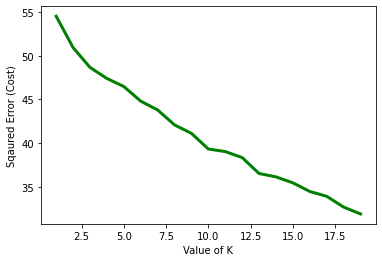

In [6]:
CLUSTEER_MAX_RANGE = 20

cost =[]
for i in range(1, CLUSTEER_MAX_RANGE):
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(vectors)
      
    # calculates squared error
    # for the clustered points
    cost.append(KM.inertia_)     
  
# plot the cost against K values
plt.plot(range(1, CLUSTEER_MAX_RANGE), cost, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Sqaured Error (Cost)")
plt.show() # clear the plot
  

#### now that we have determined the best value for K , let's run our K-means algo

#### To visualize, we’ll plot the features in a 2D space. As we know the dimension of features that we obtained from TfIdfVectorizer is quite large ( > 10,000), we need to reduce the dimension before we can plot. For this, we’ll ues PCA to transform our high dimensional features into 2 dimensions.



{   'Alain_Madelin_702.txt': 1,
    'Arlette_Laguiller_201.txt': 2,
    'Arlette_Laguiller_299.txt': 2,
    'Arlette_Laguiller_38.txt': 2,
    'Arlette_Laguiller_47.txt': 2,
    'Arlette_Laguiller_70.txt': 2,
    'Arlette_Laguiller_765.txt': 2,
    'Arlette_Laguiller_810.txt': 2,
    'Arlette_Laguiller_86.txt': 2,
    'Arlette_Laguiller_97.txt': 2,
    'Bruno_Mégret_466.txt': 0,
    'Corinne_Lepage_889.txt': 1,
    'Dominique_Voynet_663.txt': 1,
    'Eva_Joly_339.txt': 1,
    'Eva_Joly_725.txt': 1,
    'François_Bayrou_108.txt': 1,
    'François_Bayrou_156.txt': 1,
    'François_Bayrou_257.txt': 1,
    'François_Bayrou_259.txt': 1,
    'François_Bayrou_546.txt': 1,
    'François_Bayrou_751.txt': 1,
    'François_Bayrou_798.txt': 1,
    'François_Bayrou_814.txt': 1,
    'François_Bayrou_886.txt': 1,
    'François_Bayrou_965.txt': 1,
    'François_Hollande_188.txt': 1,
    'François_Hollande_227.txt': 1,
    'François_Hollande_286.txt': 1,
    'François_Hollande_402.txt': 1,
    'Françoi

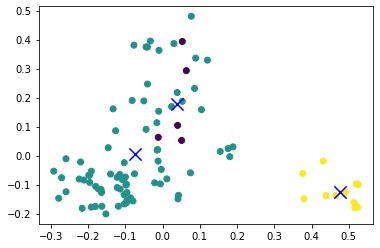

In [7]:


NB_CLUSTERS = 3
random_state = 10

cls = MiniBatchKMeans(n_clusters=NB_CLUSTERS, random_state=random_state)
cls.fit(vectors)


# predict cluster labels for new dataset
xx = cls.predict(vectors)
#print(xx)
result = fullDataset
counter = 0
for k, v in result.items():
    result[k] = xx[counter]
    counter = counter + 1
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(result)
  



# reduce the features to 2D
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(vectors.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)


#Now that we have reduced our features and cluster centers into 2D, we can plot those points using a scatter plot. 
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(vectors))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')






### in order to evaluate our clustering we will use Silhouette Coefficient.
#### The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. 
#### The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.



In [8]:

silhouette_score(vectors, labels=cls.predict(vectors))

0.06356121483430786

In [ ]:
'''
François_Bayrou    2012  2007  2002  
Lionel_Jospin      2002
Jean-Luc_Mélenchon 2022  2017  2012  
José_Bové          2007
Jean-Marie_Le_Pen   2007  2002
François_Hollande   2012
Arlette_Laguiller   2007   2002
Ségolène_Royal      2007
Jean-Pierre_Chevènement   2002
Jacques_Chirac    2002
Corinne_Lepage    2002
Bruno_Mégret      2002
Nicolas_Sarkozy    2012  2007
Alain_Madelin      2002
Nathalie_Arthaud  2017  2012
Dominique_Voynet
Robert_Hue        2002
Marie-George_Buffet  2007
Philippe_Poutou    2022  2017  2012  
Olivier_Besancenot  2007  2002  
Gérard_Schivardi   2007  
Eva_Joly         2012
Marine_Le_Pen   2022  2017  2012
'''


